In [357]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')




sub_format = pd.read_csv('../data/SubmissionFormat (1).csv')
test = pd.read_csv('../data/test.csv')
labels = pd.read_csv('../data/labels.csv')
train = pd.read_csv('../data/trainingvalues.csv')

In [358]:
labels.replace(to_replace='functional needs repair', value='functional', inplace=True)
labels.drop(['id'], axis=1, inplace=True)

In [359]:
 train.drop(['id', 'date_recorded', 'funder', 'wpt_name', 'subvillage', 'lga', 'ward', 'public_meeting', 'recorded_by', 
             'scheme_name', 'permit', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group',
             'payment', 'payment_type', 'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group'],
             axis=1, inplace=True)

In [360]:
X = train
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [361]:
subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer()),
                           ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [362]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, ['amount_tsh', 'gps_height', 'longitude',
                                                                   'latitude', 'region_code', 'district_code',
                                                                   'construction_year']),
                                     ('subpipe_cat', subpipe_cat, ['installer', 'basin', 'region',
                                                                      'scheme_management', 'extraction_type',
                                                                      'water_quality', 'quantity', 'source',
                                                                      'waterpoint_type'])],
                                     remainder='passthrough', sparse_threshold=0)

In [363]:
rfc = RandomForestClassifier(random_state=42,max_depth=65)

rfc_model_pipe = Pipeline([('ct', CT), ('rfc', rfc)])

In [364]:
rfc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'longitude', 'latitude',
                                                   'region_code',
                                                   'district_code',
                                                   'construction_year']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_imput

In [365]:
y_pred = rfc_model_pipe.predict(X_train) 
print(classification_report(y_train, y_pred))

                precision    recall  f1-score   support

    functional       1.00      1.00      1.00     27393
non functional       1.00      1.00      1.00     17157

      accuracy                           1.00     44550
     macro avg       1.00      1.00      1.00     44550
  weighted avg       1.00      1.00      1.00     44550



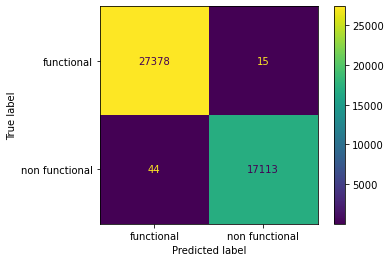

In [366]:
plot_confusion_matrix(rfc_model_pipe, X_train, y_train,);




In [367]:
rfc_model_pipe`

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'longitude', 'latitude',
                                                   'region_code',
                                                   'district_code',
                                                   'construction_year']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_imput

In [274]:
rfc_model_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'longitude', 'latitude',
                                                   'region_code',
                                                   'district_code',
                                                   'construction_year']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_imput

In [369]:
y_train_tr = LabelEncoder().fit_transform(y_train)


In [370]:
cv_results2 = cross_val_score(rfc_model_pipe, X_train, y_train_tr, cv=5, scoring='recall')
cv_results2

array([0.76129408, 0.77178665, 0.76129408, 0.78205128, 0.76048951])

In [375]:
rfc_model_pipe.score(X_test, y_test)

0.8585185185185186

In [376]:
y_pred_rfc = rfc_model_pipe.predict(X_test)

In [377]:
print(classification_report(y_test, y_pred_rfc))

                precision    recall  f1-score   support

    functional       0.86      0.92      0.89      9183
non functional       0.85      0.77      0.81      5667

      accuracy                           0.86     14850
     macro avg       0.86      0.84      0.85     14850
  weighted avg       0.86      0.86      0.86     14850



In [378]:
final_model = rfc_model_pipe

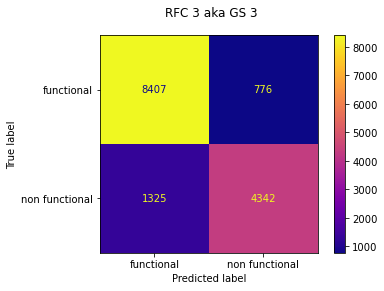

In [380]:
fig, ax = plt.subplots()

fig.suptitle("RFC 3 aka GS 3")

plot_confusion_matrix(final_model, X_test, y_test, ax=ax, cmap="plasma");

In [282]:
y['status_group'].value_counts()

functional        36576
non functional    22824
Name: status_group, dtype: int64

In [300]:
boolean = {
    'functional': 0,
    'non functional': 1,
}

In [301]:
y['well_condition'] = y['status_group'].map(boolean)

In [302]:
y.head(15)

,status_group,well_condition
0,functional,0
1,functional,0
2,functional,0
3,non functional,1
4,functional,0
5,functional,0
6,non functional,1
7,non functional,1
8,non functional,1
9,functional,0


In [303]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   status_group    59400 non-null  object
 1   well_condition  59400 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [304]:
y.isna().sum()

status_group      0
well_condition    0
dtype: int64

In [305]:
y['well_condition'] = y['well_condition'].astype(int)

In [306]:
y['well_condition'].value_counts()

0    36576
1    22824
Name: well_condition, dtype: int64

In [307]:
corr = pd.concat([X, y], axis=1)

In [308]:
corr.isna().sum()

amount_tsh              0
gps_height              0
installer            3655
longitude               0
latitude                0
num_private             0
basin                   0
region                  0
region_code             0
district_code           0
population              0
scheme_management    3877
construction_year       0
extraction_type         0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
well_condition          0
dtype: int64

In [309]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   gps_height         59400 non-null  int64  
 2   installer          55745 non-null  object 
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   num_private        59400 non-null  int64  
 6   basin              59400 non-null  object 
 7   region             59400 non-null  object 
 8   region_code        59400 non-null  int64  
 9   district_code      59400 non-null  int64  
 10  population         59400 non-null  int64  
 11  scheme_management  55523 non-null  object 
 12  construction_year  59400 non-null  int64  
 13  extraction_type    59400 non-null  object 
 14  water_quality      59400 non-null  object 
 15  quantity           59400 non-null  object 
 16  source             594

In [310]:
corr = corr.dropna()

In [311]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51927 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         51927 non-null  float64
 1   gps_height         51927 non-null  int64  
 2   installer          51927 non-null  object 
 3   longitude          51927 non-null  float64
 4   latitude           51927 non-null  float64
 5   num_private        51927 non-null  int64  
 6   basin              51927 non-null  object 
 7   region             51927 non-null  object 
 8   region_code        51927 non-null  int64  
 9   district_code      51927 non-null  int64  
 10  population         51927 non-null  int64  
 11  scheme_management  51927 non-null  object 
 12  construction_year  51927 non-null  int64  
 13  extraction_type    51927 non-null  object 
 14  water_quality      51927 non-null  object 
 15  quantity           51927 non-null  object 
 16  source             519

In [312]:
corr.corr()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,well_condition
amount_tsh,1.000000,0.085328,0.024606,-0.067183,0.003209,-0.031858,-0.033403,0.014994,0.076374,-0.057948
gps_height,0.085328,1.000000,0.153597,-0.102572,0.006293,-0.175432,-0.168893,0.127862,0.651231,-0.127647
longitude,0.024606,0.153597,1.000000,-0.425591,0.024589,0.010045,0.142679,0.078835,0.405264,0.039527
latitude,-0.067183,-0.102572,-0.425591,1.000000,0.007952,-0.223174,-0.189903,-0.029695,-0.300719,-0.036658
num_private,0.003209,0.006293,0.024589,0.007952,1.000000,-0.024273,-0.006705,0.004336,0.026250,-0.003796
region_code,-0.031858,-0.175432,0.010045,-0.223174,-0.024273,1.000000,0.706934,0.087664,0.023549,0.102293
district_code,-0.033403,-0.168893,0.142679,-0.189903,-0.006705,0.706934,1.000000,0.063718,0.060214,0.082190
population,0.014994,0.127862,0.078835,-0.029695,0.004336,0.087664,0.063718,1.000000,0.248765,-0.013461
construction_year,0.076374,0.651231,0.405264,-0.300719,0.026250,0.023549,0.060214,0.248765,1.000000,-0.056935
well_condition,-0.057948,-0.127647,0.039527,-0.036658,-0.003796,0.102293,0.082190,-0.013461,-0.056935,1.000000


In [313]:
x.inf0

NameError: name 'x' is not defined

In [ ]:
X = X.drop(columns=)

In [264]:
y = y.drop(columns='status_group')

In [265]:
import statsmodels.api as sm
X_c = sm.add_constant(X)
simple_model = sm.OLS(y, X_c)


simple_model_results = simple_model.fit()
print(simple_model_results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).